<a href="https://colab.research.google.com/github/aasharib/CV_Assignment_3/blob/main/CV_Assignment_3_vgg_without_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

!unzip -q /content/drive/MyDrive/Semester1/CV/Assignment/3/intel-image-classification.zip -d /content/assgn3

replace /content/assgn3/seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace /content/assgn3/seg_pred/seg_pred/10005.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Nono


In [3]:
from sklearn.datasets import load_files
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
trainData = load_files('/content/assgn3/seg_train/seg_train',load_content=False)
testData = load_files('/content/assgn3/seg_test/seg_test',load_content=False)
#validationData = load_files('/content/assgn3/seg_pred/seg_pred',load_content=False)

In [5]:
trainData

{'DESCR': None,
 'filenames': array(['/content/assgn3/seg_train/seg_train/glacier/6416.jpg',
        '/content/assgn3/seg_train/seg_train/buildings/5658.jpg',
        '/content/assgn3/seg_train/seg_train/street/7656.jpg', ...,
        '/content/assgn3/seg_train/seg_train/sea/13907.jpg',
        '/content/assgn3/seg_train/seg_train/sea/3467.jpg',
        '/content/assgn3/seg_train/seg_train/forest/14133.jpg'],
       dtype='<U55'),
 'target': array([2, 0, 5, ..., 4, 4, 1]),
 'target_names': ['buildings',
  'forest',
  'glacier',
  'mountain',
  'sea',
  'street']}

In [6]:
trainDataLabel = trainData.target

In [7]:
def readAndPreprocessImage(imgFile):
    curImg = np.asarray(Image.open(imgFile).resize((150,150)))
    if curImg is not None:
        #print("Done", imgFile)
        return curImg 

In [8]:
trainDataImgArr = np.array(list(map(readAndPreprocessImage, trainData.filenames)))

In [9]:
(trainingDataImgX, validationDataImgX, trainingDataLabelY, validationDataLabelY) = train_test_split(trainDataImgArr, trainDataLabel, test_size=0.2, random_state=42)

2
3


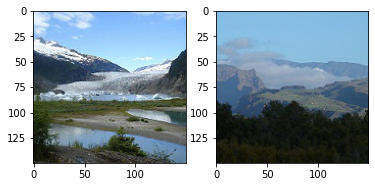

In [10]:

fig, ax = plt.subplots(1,2,figsize=(6,6))
ax[0].imshow(trainingDataImgX[0])
ax[1].imshow(trainingDataImgX[1])
print(trainingDataLabelY[0])
print(trainingDataLabelY[1])

In [11]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

vgg16 = Sequential()
vgg16.add(Conv2D(64, kernel_size=3, padding='same', activation='relu',
                 input_shape=(150, 150, 3)))
vgg16.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
#vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
#vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
#vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
#vgg16.add(Dropout(0.25))

vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
vgg16.add(MaxPooling2D(pool_size=2, strides=2))
#vgg16.add(Dropout(0.25))

vgg16.add(Flatten())

vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dense(4096, activation='relu'))

# the data we are using has 6 classes
vgg16.add(Dense(6, activation='softmax'))

In [12]:
vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 256)       2

In [13]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
vgg16.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [14]:
trainingDataLabelY[0]

2

In [15]:
from keras.utils import to_categorical
trainingDataLabelOHE = to_categorical(trainingDataLabelY)
validationDataLabelOHE = to_categorical(validationDataLabelY)

In [16]:
trainingDataLabelOHE[0]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [17]:
H = vgg16.fit(trainingDataImgX, trainingDataLabelOHE, batch_size=256, epochs=50, validation_data=(validationDataImgX, validationDataLabelOHE))

Epoch 1/50
44/44 [==============================] - 98s 2s/step - loss: 1.7641 - accuracy: 0.2395 - val_loss: 1.7758 - val_accuracy: 0.2512
Epoch 2/50
44/44 [==============================] - 72s 2s/step - loss: 1.7467 - accuracy: 0.2480 - val_loss: 1.5058 - val_accuracy: 0.4400
Epoch 3/50
44/44 [==============================] - 73s 2s/step - loss: 1.4259 - accuracy: 0.4380 - val_loss: 1.1549 - val_accuracy: 0.5607
Epoch 4/50
44/44 [==============================] - 73s 2s/step - loss: 1.1450 - accuracy: 0.5497 - val_loss: 1.1938 - val_accuracy: 0.5102
Epoch 5/50
44/44 [==============================] - 73s 2s/step - loss: 1.1166 - accuracy: 0.5495 - val_loss: 1.0361 - val_accuracy: 0.5900
Epoch 6/50
44/44 [==============================] - 73s 2s/step - loss: 1.0186 - accuracy: 0.6030 - val_loss: 1.0029 - val_accuracy: 0.5996
Epoch 7/50
44/44 [==============================] - 73s 2s/step - loss: 0.9557 - accuracy: 0.6261 - val_loss: 1.0412 - val_accuracy: 0.5832
Epoch 8/50
44/44 [==

In [24]:
# save the model's trained weights
vgg16.save_weights('vgg_trained_without_dropout.h5')

In [19]:
#!cp /content/vgg16_trained_normal_vgg.h5 /content/drive/MyDrive/Semester1/CV/Assignment/3

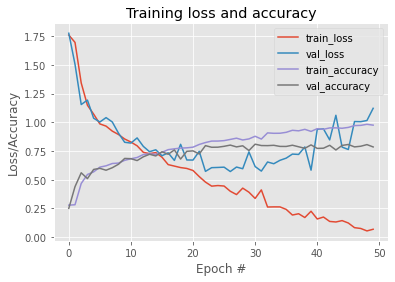

In [20]:
import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [21]:
testDataImgArr = np.array(list(map(readAndPreprocessImage, testData.filenames)))
testDataLabel = testData.target
testDataLabelOHE = to_categorical(testDataLabel)

In [22]:
'''CONFUSION MATRIX'''
# Making prediction
predicatedTestDataY = vgg16.predict_classes(testDataImgArr)
actualTestDataY = np.argmax(testDataLabelOHE, axis=-1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(actualTestDataY, predicatedTestDataY)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
print(confusionMatrix)

[[403   4   5   1   5  19]
 [ 15 421   4   8   2  24]
 [  9   4 409  78  48   5]
 [ 14   3  76 400  31   1]
 [ 16   3  51  38 400   2]
 [166   3   3   6   3 320]]
